In [1]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

In [2]:
import riskModelPercept as model
import WeiPerception as wei

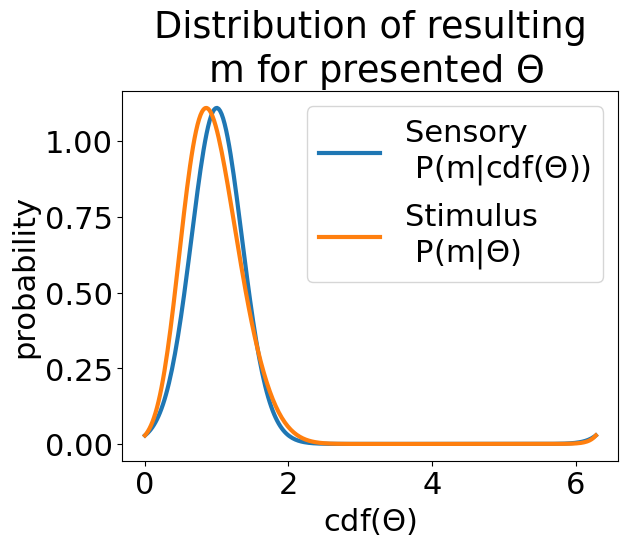

In [3]:
plt.plot(model.rep_grid,ss.vonmises(loc=1.0, kappa=8).pdf(model.rep_grid), label = "Sensory\n P(m|cdf($\Theta$))")
plt.plot(model.rep_grid,ss.vonmises(loc=1.0, kappa=8).pdf(model.cdf(model.rep_grid, model.rep_grid)), label = "Stimulus\n P(m|$\Theta$)")


plt.xlabel('cdf($\Theta$)')
plt.ylabel('probability')
plt.title('Distribution of resulting\n m for presented $\Theta$')
plt.legend()

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

In [ ]:
y=wei.x
y = np.append(y,2*np.pi)

ppp1 = wei.bias(kappa = 8, kappa_s = 10000)
ppp1[0]=ppp1[0]-2*np.pi
ppp1 = np.append(ppp1,ppp1[0])

ppp2 = wei.bias(kappa = 8, kappa_s = 32)
# ppp2[0]=ppp2[0]-2*np.pi
ppp2 = np.append(ppp2,ppp2[0])
ppp3 = wei.bias(kappa = 8, kappa_s = 16)
# ppp3[0]=ppp3[0]-2*np.pi
ppp3 = np.append(ppp3,ppp3[0])
ppp4 = wei.bias(kappa = 8, kappa_s = 8)
# ppp4[0]=ppp4[0]-2*np.pi
ppp4 = np.append(ppp4,ppp4[0])
ppp5 = wei.bias(kappa = 8, kappa_s = 4)
# ppp5[0]=ppp5[0]-2*np.pi
ppp5 = np.append(ppp5,ppp5[0])

# ppp1
plt.plot(90*y/np.pi,90*ppp1/np.pi)
plt.ylim(-2,2)
plt.plot(90*y/np.pi,90*ppp2/np.pi)
plt.plot(90*y/np.pi,90*ppp3/np.pi)
plt.plot(90*y/np.pi,90*ppp4/np.pi)
plt.plot(90*y/np.pi,90*ppp5/np.pi)


plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')

plt.xlabel('Theta')
plt.ylabel('Bias')
plt.title('Wei : Bias -\n Varying stimulus noise')

In [ ]:

y = model.stim_grid

theta0 = np.linspace(0.0, 2.*np.pi, 500) #0.8
kappa1 = 10000
kappa2 = 32
kappa3 = 16
kappa4 = 8
kappa5 = 4


normalize = False

kappa_r = 8

pp1 = model.wei_bias(theta0, kappa1, kappa_r, normalize)
pp1[0]=pp1[0]#-2*np.pi


pp2 = model.wei_bias(theta0, kappa2, kappa_r, normalize)
pp2[0]=pp2[0]-2*np.pi


pp3 = model.wei_bias(theta0, kappa3, kappa_r, normalize)
pp3[0]=pp3[0]-2*np.pi

pp4 = model.wei_bias(theta0, kappa4, kappa_r, normalize)
pp4[0]=pp4[0]#-2*np.pi

pp5 = model.wei_bias(theta0, kappa5, kappa_r, normalize)
pp5[0]=pp5[0]#-2*np.pi

# ppp1
plt.plot(90*y/np.pi,90*pp1/np.pi)
plt.ylim(-2,2)
plt.plot(90*y/np.pi,90*pp2/np.pi)
plt.plot(90*y/np.pi,90*pp3/np.pi)
plt.plot(90*y/np.pi,90*pp4/np.pi)
plt.plot(90*y/np.pi,90*pp5/np.pi)


plt.title('relative bias-stimulus noise\n Our code, wei method')

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')
plt.axvline(157.5, c='k')

plt.xlabel('theta')
plt.ylabel('bias')

In [ ]:
## Gifs

In [ ]:
theta0List = np.linspace((0./90.)*np.pi, (45./90.)*np.pi, 23)
sigma_stim = 0.05*np.pi

i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.stim_grid*180./np.pi, np.squeeze(model.stimulus_noise(theta0, kappa_s=sigma_stim, grid=model.stim_grid[np.newaxis, :])))
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
        
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
    
    plt.legend()
    
    plt.title("Noisy stimulus (completely controllable in the experiment)")
    plt.xlabel("$\Theta$ (in degrees)")
    plt.ylabel("P($\Theta$)")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()

In [ ]:
# Back to simulations now of value

In [ ]:
high_stim_noise = 32
low_stim_noise = 10000
high_rep_noise = 8
low_rep_noise = 16


theta0 = 10.*np.pi/90.0
type = "linearPrior"
interpolation_kind = "linear"
bins = 25
kappa_s = low_stim_noise
kappa_r =  low_rep_noise

safe_value, safe_prob = model.safe_value_dist(theta0, kappa_s, kappa_r, type, interpolation_kind, bins)

In [ ]:
def plot_safeVal(theta0, sigma_stim, sigma_rep):

    
    safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, interpolation_kind, bins=100)
    plt.plot(safe_value,safe_prob[0,:])
    plt.xlabel("Value")
    plt.ylabel("Inferred Val Distribution")
    

In [ ]:
interact(plot_safeVal, theta0 = ((0./90.)*np.pi, (45./90.)*np.pi, 2./90.*np.pi), sigma_stim = ((0.1/90.0)*np.pi, (3./90.0)*np.pi, (0.1/90.0)*np.pi), sigma_rep = ((0.1/90.0), (3./90.0), (0.1/90.0)))


interactive(children=(FloatSlider(value=0.767944870877505, description='theta0', max=1.5707963267948966, step=…

<function __main__.plot_safeVal(theta0, sigma_stim, sigma_rep)>

In [3]:
# safe values throughout theta

high_stim_noise = 32
low_stim_noise = 10000
high_rep_noise = 32
low_rep_noise = 128
bins = 25
kappa_s = high_stim_noise
kappa_r =  high_rep_noise

type = "inverseLinearPrior"
interpolation_kind = "linear"


safe_value, safe_prob = model.safe_value_dist(theta0,kappa_s, kappa_r, type, interpolation_kind, bins)
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plot_safeVal(theta0, sigma_stim, sigma_rep)
    
#     mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
#     plt.axvline(model.value_function_ori(theta0, type), c='k', label = '$Value of mean presented orientation$ = %.2f°'%(model.value_function_ori(theta0, type)))
#     plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))
#     plt.legend()
    
    plt.title("Inferred value distribution distribution for $\Theta_0$ = %0.2d°.\nHigh stimulus and high sensory noise"%((theta0*180.)/np.pi))


#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



NameError: name 'theta0' is not defined

In [ ]:
def plot_riskyVal(theta1, sigma_stim, sigma_rep):
    risk_prob = 0.75
    interpolation_kind = "linear"

    safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
    risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=100)
    plt.plot(risky_value,risky_prob[0,:])
    plt.xlabel("Value")
    plt.ylabel("Inferred Val Distribution")
    plt.title("risky value")
    
    

In [ ]:
interact(plot_riskyVal, theta1 = ((0./90.)*np.pi, (45./90.)*np.pi, 1./90.*np.pi), sigma_stim = ((0.1/90.0)*np.pi, (3./90.0)*np.pi, (0.1/90.0)*np.pi), sigma_rep = ((0.1/90.0), (3./90.0), (0.1/90.0)))


interactive(children=(FloatSlider(value=0.767944870877505, description='theta1', max=1.5707963267948966, step=…

<function __main__.plot_riskyVal(theta1, sigma_stim, sigma_rep)>

In [ ]:
# risky values throughout theta

high_stim_noise = 12
low_stim_noise = 10000
high_rep_noise = 4
low_rep_noise = 16

sigma_stim = low_stim_noise
sigma_rep =  high_rep_noise
type = "inverseLinearPrior"
interpolation_kind = "linear"

safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plot_riskyVal(theta0, sigma_stim, sigma_rep)
    
#     mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
#     plt.axvline(model.value_function_ori(theta0, type), c='k', label = '$Value of mean presented orientation$ = %.2f°'%(model.value_function_ori(theta0, type)))
#     plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))
#     plt.legend()
    
    plt.title("Inferred value distribution distribution for $\Theta_0$ = %0.2d°.\nLow stimulus and high sensory noise"%((theta0*180.)/np.pi))


#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



[0.522   0.74024 0.95848 1.17672 1.39496 1.6132  1.83144 2.04968 2.26792
 2.48616 2.7044  2.92264 3.14088 3.35912 3.57736 3.7956  4.01384 4.23208
 4.45032 4.66856 4.8868  5.10504 5.32328 5.54152 5.75976 5.978  ]


Text(0.5, 1.0, '$\\Theta_0$ = 2degrees')

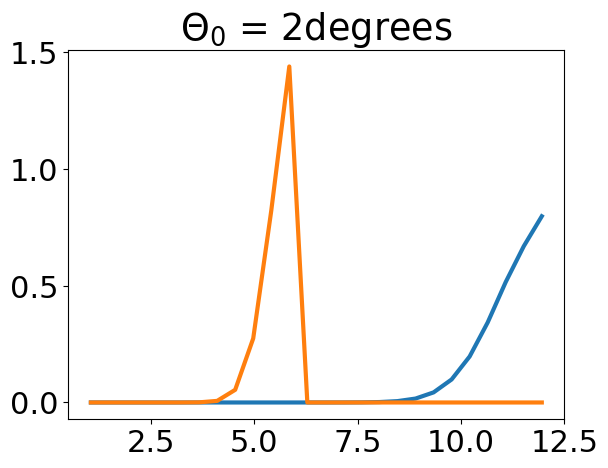

In [12]:
from scipy import interpolate

sigma_stim = 1000
sigma_rep = 64


theta0 = 2*np.pi/90.0 #30.124*np.pi/180.0
theta1 = 2*np.pi/90.0 #23.8*np.pi/180.0
type = "linearPrior"
interpolation_kind = "linear"

# sigma_stim = high_stim_noise
# sigma_rep =  low_rep_noise
bins = 25
risk_prob = 0.5


safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, interpolation_kind, bins)
risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, sigma_rep , risk_prob, type , interpolation_kind, bins)

plt.plot(safe_value,risky_prob[0,:])

plt.title("$\Theta_0$ = " + str(round(theta0*90/np.pi))+ "degrees")

In [ ]:
# How often is probability distribution 1 (risky) greater than distribution 2 (safe).

model.diff_dist(safe_value, risky_prob, safe_prob)#, model.diff_dist(safe_value, dens_risky, dens_safe[np.newaxis, :])
# model.diff_dist(safe_value, safe_prob, risky_prob)

# plt.plot(integrate.cumtrapz(risky_prob[0,:] - safe_prob[0,:], risky_value, initial=0.0))


array([[0.5]])

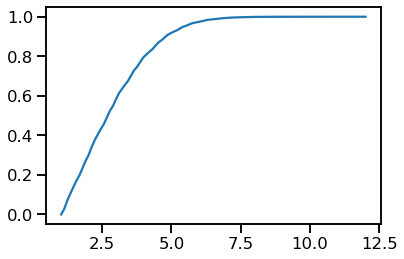

In [ ]:
from scipy import integrate

p = []
cdf2 = integrate.cumtrapz(safe_prob, safe_value, initial=0.0, axis=1)

cdf2
plt.plot(safe_value, cdf2[0])
# np.shape(cdf2)

# np.shape(risky_prob)

# prob = risky_prob*cdf2
# plt.plot(safe_value, prob[0])
# # np.shape(prob)

# # p.append(prob)
# # np.shape(p)

# integrate.trapz(prob, risky_value)


In [ ]:
cdf2

array([[0.        , 0.02743079, 0.06965486, 0.10496904, 0.13784823,
        0.17063855, 0.19762471, 0.2337669 , 0.26973846, 0.30001279,
        0.33986127, 0.37546976, 0.40368919, 0.43159093, 0.45613625,
        0.49016557, 0.52376988, 0.54842329, 0.5820254 , 0.61329375,
        0.63526876, 0.65667217, 0.67623425, 0.70337816, 0.72988166,
        0.74753488, 0.77162744, 0.79440186, 0.80912227, 0.82316623,
        0.83614315, 0.85377288, 0.8707502 , 0.88130545, 0.89541114,
        0.9087417 , 0.91684205, 0.92438486, 0.93131173, 0.94041976,
        0.94905765, 0.95414461, 0.9607234 , 0.96688614, 0.97044542,
        0.97367354, 0.97659427, 0.98029087, 0.9837409 , 0.98567868,
        0.98740748, 0.98895458, 0.99086576, 0.99263206, 0.99359789,
        0.99477105, 0.99584631, 0.99642406, 0.99692518, 0.99736482,
        0.99788582, 0.99835946, 0.99860746, 0.9988964 , 0.99915715,
        0.99929136, 0.99940444, 0.99950164, 0.99961206, 0.9997108 ,
        0.99976035, 0.99981568, 0.99986482, 0.99

# Uncovering risk attitudes

# inverseLinearPrior, inversePrior or inverseCurvedPrior

0.6324876690079452

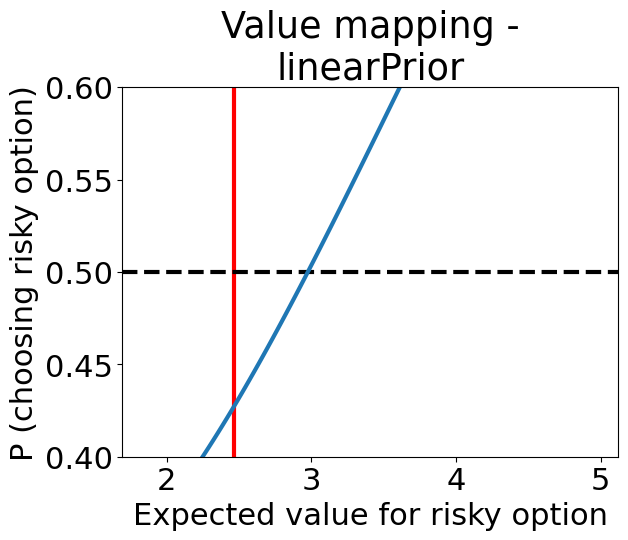

In [ ]:
# Prior
# Noise regimes

# In the linear mapping condition, if safe option is displayed with high sensory noise it results in safe option being percieved 
# with low val and if risky is with hig stim noise, it is percieved with higher value - risk seekinfg behavior



# changeable parameters
high_stim_noise = 32
low_stim_noise = 1000
high_rep_noise = 32
low_rep_noise = 128

risk_prob = 0.75
type = "linearPrior"   

# Getting all the values from actual transformation
rangeOri = np.linspace(39/90., 22/90., 100)*np.pi
val_range = model.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], high_stim_noise, low_rep_noise , type, interpolation_kind = "linear", bins=25)

risky_value, risky_prob = model.risky_value_dist((rangeOri), low_stim_noise, high_rep_noise, risk_prob, type, interpolation_kind = "linear",  bins=25)

# Risk attitudes 
p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])


# plt.legend(loc = 'lower right')

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

model.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)

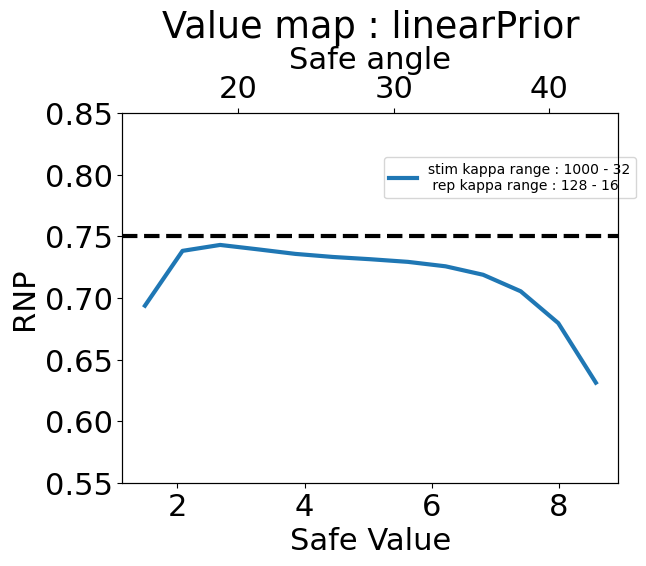

In [329]:

# In the linear mapping condition, if safe option is displayed with high sensory noise it results in safe option being percieved 
# with low val and if risky is with hig stim noise, it is percieved with higher value - risk seekinfg behavior 

def find_rnp(low_rep_noise, low_stim_noise, high_rep_noise, high_stim_noise, type, risk_prob):

    # Getting all the values from actual transformation
    interval = 12
    safe_angles =  np.linspace(43/90., (2+interval)/90., int(interval+1))*np.pi
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))
    for i in range(len(safe_angles)):
        rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval/90.*np.pi), interval)
        safeVal = model.value_function_ori(safe_angles[i], type)
        val_range = model.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], high_stim_noise, low_rep_noise , type, interpolation_kind = "linear", bins=100)

        risky_value, risky_prob = model.risky_value_dist((rangeOri), low_stim_noise, high_rep_noise, risk_prob, type, interpolation_kind = "linear",  bins=100)

        # Risk attitudes 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

        safeVals[i] = safeVal
        rnp[i] = model.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)

    return safe_angles, safeVals, rnp


# setting parameters
risk_prob = 0.75
type = "linearPrior"

# changeable parameters
high_stim_list = [32]
low_stim_noise = 1000
high_rep_list = [16]
low_rep_noise = 128

fig = plt.figure()
ax1 = fig.add_subplot(111)

for high_stim_noise in high_stim_list:
    for high_rep_noise in high_rep_list:

        safe_angles, safeVals, rnp = find_rnp(low_rep_noise, low_stim_noise, high_rep_noise, high_stim_noise, type, risk_prob)

        ax1.set_ylim(0.55, 0.85)

        text = "stim kappa range : "+str(low_stim_noise)+" - "+ str(high_stim_noise)+"\n rep kappa range : "+str(low_rep_noise)+" - "+str(high_rep_noise)
        ax1.plot(safeVals[:], rnp[:], label = text)

        ax2 = ax1.twiny()
        # ax2.set_xlim(max(safe_angles*90./np.pi), min(safe_angles*90./np.pi))
        ax2.plot(safe_angles*90./np.pi, np.ones(len(safe_angles))/1.3, alpha=0.0)


ax1.axhline(risk_prob, c='k', ls='--')

ax1.legend(bbox_to_anchor=(1.05, 0.9), prop={'size': 10})
ax2.set_xlabel("Safe angle")
ax1.set_xlabel("Safe Value")
ax1.set_ylabel("RNP")
ax1.set_title("Value map : " + type) 

plt.show()



# from here 

# inversepRIOR

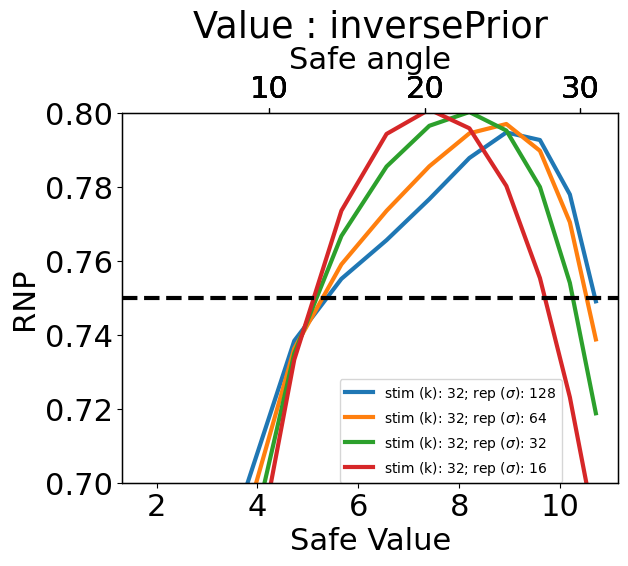

In [ ]:

# In the linear mapping condition, if safe option is displayed with high sensory noise it results in safe option being percieved 
# with low val and if risky is with hig stim noise, it is percieved with higher value - risk seekinfg behavior 

def find_rnp(stim_noise, rep_noise, type, risk_prob):

    # Getting all the values from actual transformation
    interval = 13
    safe_angles =  np.linspace(2/90., (42-interval)/90., int(interval+1))*np.pi
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))
    for i in range(len(safe_angles)):
        rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval/90.*np.pi), interval)
        safeVal = model.value_function_ori(safe_angles[i], type)
        val_range = model.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], stim_noise, rep_noise , type, interpolation_kind = "linear", bins=25)

        risky_value, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type, interpolation_kind = "linear",  bins=25)

        # Risk attitudes 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

        safeVals[i] = safeVal
        rnp[i] = model.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)

    return safe_angles, safeVals, rnp

# setting parameters
risk_prob = 0.75
type = "inversePrior"

# changeable parameters
stim_list = [32]
# low_stim_noise = 1000
rep_list = [128, 64, 32, 16] #,8, 4, 2]
# low_rep_noise = 128

fig = plt.figure()
ax1 = fig.add_subplot(111)

for stim_noise in stim_list:
    for rep_noise in rep_list:

        safe_angles, safeVals, rnp = find_rnp(stim_noise, rep_noise, type, risk_prob)

        ax1.set_ylim(0.7, 0.8)

        text = "stim (k): "+ str(stim_noise)+"; rep ($\sigma$): "+str(rep_noise)
        ax1.plot(safeVals[:], rnp[:], label = text)

        ax2 = ax1.twiny()
        # ax2.set_xlim(max(safe_angles*90./np.pi), min(safe_angles*90./np.pi))
        ax2.plot(safe_angles*90./np.pi, np.ones(len(safe_angles))/1.3, alpha=0.0)


ax1.axhline(risk_prob, c='k', ls='--')

ax1.legend(bbox_to_anchor=(0.9, 0.3), prop={'size': 10})
ax2.set_xlabel("Safe angle")
ax1.set_xlabel("Safe Value")
ax1.set_ylabel("RNP")
ax1.set_title("Value : " + type) 


plt.savefig('/Users/sbedi/Downloads/testfig1.png',dpi=300, bbox_inches = "tight")



# linearPrior, prior or curvedPrior mapping

In [6]:
def find_rnp(stim_noise, rep_noise, type, risk_prob, experimentRange):

    # Getting all the values from actual transformation
    interval = 13
    end = int(experimentRange[-2:])
    start = int(experimentRange[0:2])
    if (((type=="prior" or type=="linearPrior" or type=="curvedPrior") and (experimentRange=="45to90")) or
        ((type=="inversePrior" or type=="inverseLinearPrior" or type=="inverseCurvedPrior") and (experimentRange == "00to45"))):
            print("yes")
            safe_angles =  np.linspace(start/90., (end-interval)/90., int(interval+1))*np.pi
    elif (((type=="prior" or type=="linearPrior" or type=="curvedPrior") and (experimentRange=="00to45")) or
        ((type=="inversePrior" or type=="inverseLinearPrior" or type=="inverseCurvedPrior") and (experimentRange=="45to90"))):
            print("no")
            safe_angles =  np.linspace(end/90., (start+interval)/90., int(interval+1))*np.pi
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        if (((type=="prior" or type=="linearPrior" or type=="curvedPrior") and (experimentRange=="45to90")) or
            ((type=="inversePrior" or type=="inverseLinearPrior" or type=="inverseCurvedPrior") and (experimentRange == "00to45"))):
                rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval/90.*np.pi), interval)
        elif (((type=="prior" or type=="linearPrior" or type=="curvedPrior") and (experimentRange=="00to45")) or
            ((type=="inversePrior" or type=="inverseLinearPrior" or type=="inverseCurvedPrior") and (experimentRange=="45to90"))):
                rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval/90.*np.pi), interval)


        safeVal = model.value_function_ori(safe_angles[i], type)
        safeVals[i] = safeVal
        print(safe_angles[i]*90./np.pi, safeVal)
        # print(safeVal)
        val_range = model.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)
        # print(min(riskyVal_range), max(riskyVal_range)) 

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], stim_noise, rep_noise , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type, bins=100)

        # Risk attitudes 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        rnp[i] = model.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
        print(rnp[i])
    return safe_angles, safeVals, rnp




no
45.0 1.0000000000000018
0.3365377465836159
42.53846153846153 1.6017094017094013
0.5157754001735656
40.07692307692307 2.2034188034188045
0.6342123149719351
37.61538461538461 2.805128205128206
0.701360189164124
35.15384615384615 3.406837606837607
0.7355487895003142
32.69230769230769 4.0085470085470085
0.7528565020083535
30.23076923076923 4.61025641025641
0.7617000957215116
27.76923076923077 5.211965811965811
0.7646177865357598
25.307692307692307 5.813675213675214
0.762376000692908
22.846153846153843 6.415384615384616
0.7564929245015583
20.384615384615383 7.017094017094017
0.7492316684627104
17.923076923076923 7.618803418803419
0.7407139610384443
15.461538461538463 8.22051282051282
0.724648183754983
12.999999999999998 8.822222222222223
0.6817528038677841


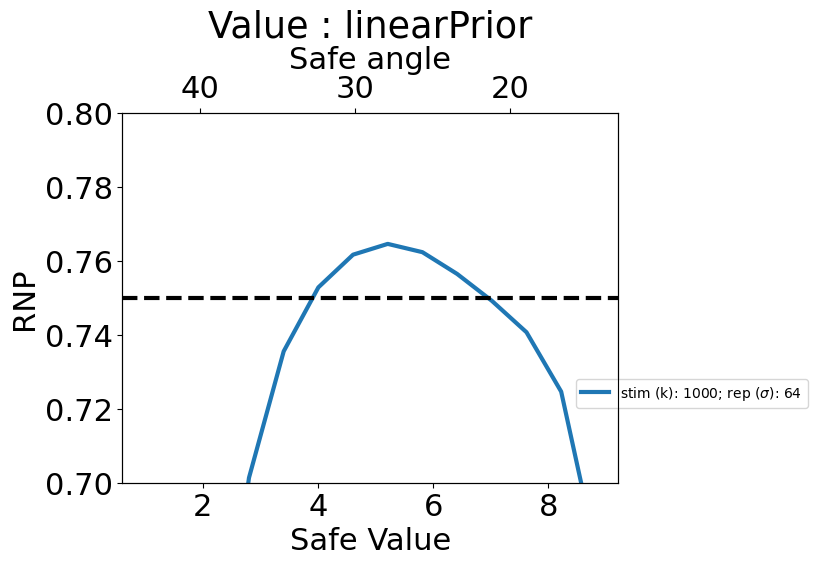

In [12]:
# setting parameters
experimentRange = "00to45"#"00to45"
risk_prob = 0.75
type = "linearPrior" 

# changeable parameters
stim_list = [1000]
rep_list = [64]

fig = plt.figure()
ax1 = fig.add_subplot(111)

for stim_noise in stim_list:
    for rep_noise in rep_list:

        safe_angles, safeVals, rnp = find_rnp(stim_noise, rep_noise, type, risk_prob, experimentRange)

        ax1.set_ylim(0.70, 0.8)

        text = "stim (k): "+ str(stim_noise)+"; rep ($\sigma$): "+str(rep_noise)
        ax1.plot(safeVals[:], rnp[:], label = text)

        ax2 = ax1.twiny()
        if (((type=="prior" or type=="linearPrior" or type=="curvedPrior") and (experimentRange=="00to45")) or
            ((type=="inversePrior" or type=="inverseLinearPrior" or type=="inverseCurvedPrior") and (experimentRange=="45to90"))):
                ax2.set_xlim(max(safe_angles*90./np.pi), min(safe_angles*90./np.pi))
    
        ax2.plot(safe_angles*90./np.pi, np.ones(len(safe_angles))/1.3, alpha=0.0)

ax1.axhline(risk_prob, c='k', ls='--')
ax1.legend(bbox_to_anchor=(0.9, 0.3), prop={'size': 10})
ax2.set_xlabel("Safe angle")
ax1.set_xlabel("Safe Value")
ax1.set_ylabel("RNP")
ax1.set_title("Value : " + type) 


plt.savefig('/Users/sbedi/Downloads/testfig1.png',dpi=300, bbox_inches = "tight")

# risk of an option

# risk of an option

indifference: 2.3433391137118127
safeVal: 1.6633811713550077


0.7098337417840638

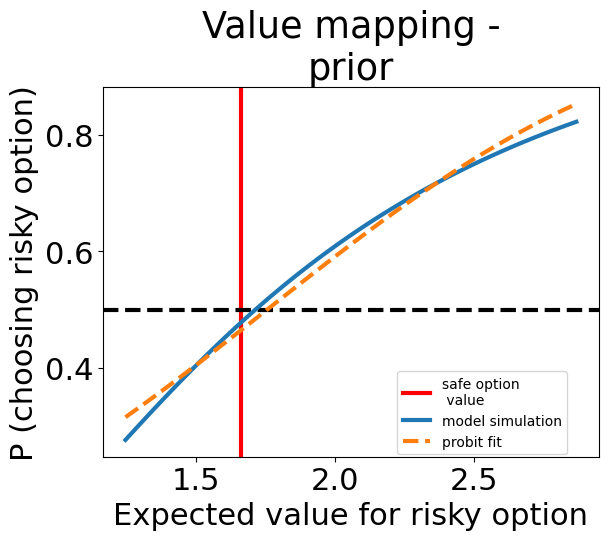

In [438]:

# changeable parameters
stim_noise = 64
rep_noise = 1000

risk_prob = 0.75
type = "prior" 
start = 35

# Getting all the values from actual transformation
interval = 11
rangeOri = np.linspace(start/90., (start-interval)/90., 100)*np.pi
val_range = model.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], stim_noise, rep_noise , type, interpolation_kind = "linear", bins=25)

risky_value, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type, interpolation_kind = "linear",  bins=25)

# Risk attitudes 
p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
# plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky), label = "model simulation")#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])

from scipy.optimize import minimize

y = p_chose_risky.ravel()
x = val_range.ravel()


def get_probit(x, intercept, slope):
    return ss.norm(0.0, 1.0).cdf(intercept + slope*x)

def cost(xs, ps, intercept, slope):
    return np.sum((get_probit(xs, intercept, slope) - ps)**2)

def cost_(pars, *args):
    intercept, slope = pars
    return cost(x, y, intercept, slope)

result = minimize(cost_, (-safeVal/risk_prob, 1.0), method='L-BFGS-B')

intercept_est, slope_est = result.x

indifference_point = -intercept_est/slope_est

rnp = safeVal / indifference_point

plt.plot(riskyVal_range, get_probit(x, intercept_est, slope_est), "--", label = "probit fit")

plt.legend(bbox_to_anchor=(0.95, 0.25), prop={'size': 10})

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

print("indifference:", indifference_point)
print("safeVal:", safeVal)
model.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)

Text(0, 0.5, 'Mean bias')

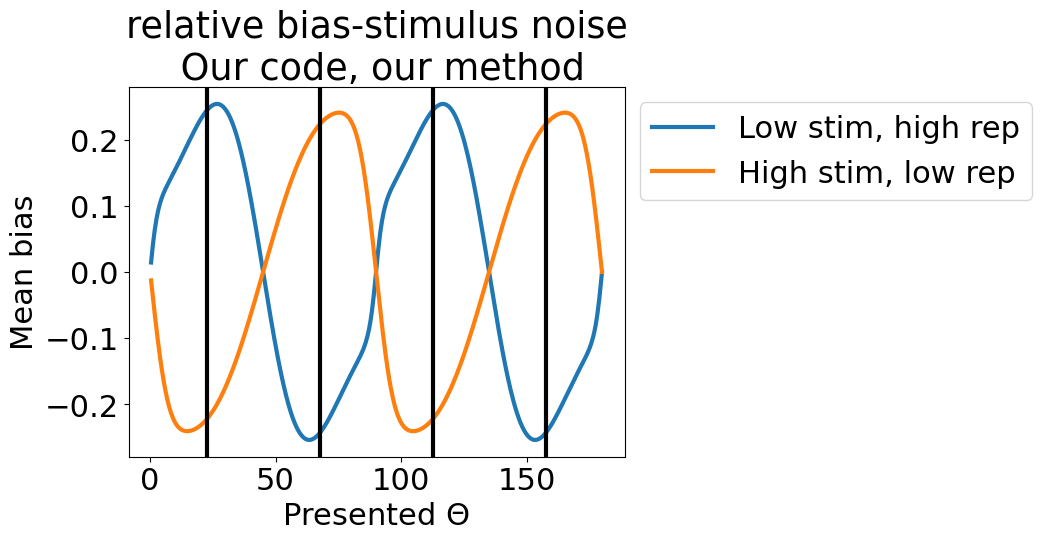

In [9]:
theta0 = np.linspace(0.00, 2.0*np.pi, 500) #0.8
# theta0 = theta0[:-1]
kappa1 =1000
kappa2 = 64

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa1, kappa, normalize = False)
# plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi, label = "Low stim")

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappas1, kappar1, normalize = False)
# plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "Low stim, low rep")


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa1, kappa2, normalize = False)
plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "Low stim, high rep")



E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa2, kappa1, normalize = False)
plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "High stim, low rep")




# plt.ylim(-2,2)

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')
plt.axvline(157.5, c='k')


plt.legend(bbox_to_anchor=(1., 1.0))

plt.title('relative bias-stimulus noise\n Our code, our method')
plt.xlabel("Presented $\Theta$")
plt.ylabel("Mean bias")
# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")